<a href="https://colab.research.google.com/github/robsonbrandao/artigos/blob/main/04%20-%20ProcessamentoLinguagemNatural/ProcessamentoLinguagemNatural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural**


---



## **Instalando o pacote spacy e modelos de linguagem**

In [1]:
import spacy

### Atualizando o spacy

In [2]:
!pip install --upgrade spacy

     |████████████████████████████████| 6.0 MB 5.0 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 451 kB 38.0 MB/s 
     |████████████████████████████████| 10.1 MB 29.5 MB/s 
     |████████████████████████████████| 181 kB 41.3 MB/s 
     |████████████████████████████████| 653 kB 34.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [1]:
# Chamar o spacy com a nova versão
import spacy

In [2]:
!pip install -U spacy-lookups-data 

     |████████████████████████████████| 98.5 MB 113 kB/s 


**Baixar os modelos de Linguagem**

**pt_core_news_lg** é mais completo, porém mais lento

**pt_core_news_st** é a outra opção

In [3]:
!python -m spacy download pt_core_news_lg

     |████████████████████████████████| 577.4 MB 5.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


**Trabalhar com o primeiro texto**

In [4]:
texto = "O presente trabalho teve como objetivo caracterizar morfometrica, morfologica e estereologicamente as possiveis alteracoes presentes no epitelio da mucosa lingual, nas glandulas salivares de weber e de von ebner, na lamina propria e no tecido muscular estriado, determinadas pelo envelhecimento. Para tanto, foram utilizados 14 ratos machos, dos quais 7 apresentavam idades de 4 e 7 meses (adultos) e outros 7, idades de 20 e 29 meses (senis). Os resultados obtidos neste trabalho sugerem a possibilidade de o envelhecimento atuar: 1- no epitelio de revestimento da lingua de maneira diferente em cada regiao, provocando diminuicao da densidade numerica celular com aumento do volume citoplasmatico na regiao dorsal anterior, alem de diminuicao da espessura total do epitelio das regioes dorsal anterior e ventral, e na espessura da camada de ceratina com diminuicao na regiao ventral. 2- nas papilas filiformes provocando alteracao no volume relativo da camada de ceratina nas glandulas linguais. 3- provocando atrofia do parenquima acinar e concomitantemente aumento do tecido conjuntivo inter-acinar na glandula de von ebner, alem de diminuicao na espessura da parede ductular da glandula de weber. 4- nas fibras musculares provocando hipertrofia generalizada"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Carregar o modelo de linguagem

nlp = spacy.load('pt_core_news_lg')
doc = nlp(texto)

## **Arquivos, segmentação, tokenização e lematização**

In [27]:
arquivo1 = open('texto2.txt','r')
conteudo = arquivo1.read()
conteudo

'Existe a hipotese que a lesao tecidual observada na doenca de chagas cronica possa ser resultado de um mecanismo autoimune. Soros de 102 pacientes com doenca de chagas cronica foram estudados. Somente 4 soros apresentaram fluorescencia positiva na celula hep 2. Todos os soros foram negativos por contraimunoeletroforese e tambem para o anticorpos anti-dna nativo. Observamos uma reatividade fraca e heterogenea para o extrato total de celula hela em 31% dos soros. Identificamos ainda, anticorpos dirigidos contra uma proteina ribossomal de 23kd em aproximadamente 1/3 dos soros de chagas. A natureza autoimune deste anticorpo foi confirmada utilizando ribossoma de celula hela como antigeno. Em constraste, nenhuma autorreatividade foi detectada para as proteinas ribossomais p0, p1 e p2. Esses dados confirmam a existencia de autoimunidade na doenca de chagas. A resposta imune seletiva para uma proteina ribossomal que reage cruzadamente com antigeno do parasita sugere que os autoanticorpos nao

In [28]:
nlp = spacy.load('pt_core_news_lg')
doc = nlp(conteudo)

**Segmentação**

Separar o texto conforme um separador indicado

In [29]:
sentencas = conteudo.split(".")
sentencas

['Existe a hipotese que a lesao tecidual observada na doenca de chagas cronica possa ser resultado de um mecanismo autoimune',
 ' Soros de 102 pacientes com doenca de chagas cronica foram estudados',
 ' Somente 4 soros apresentaram fluorescencia positiva na celula hep 2',
 ' Todos os soros foram negativos por contraimunoeletroforese e tambem para o anticorpos anti-dna nativo',
 ' Observamos uma reatividade fraca e heterogenea para o extrato total de celula hela em 31% dos soros',
 ' Identificamos ainda, anticorpos dirigidos contra uma proteina ribossomal de 23kd em aproximadamente 1/3 dos soros de chagas',
 ' A natureza autoimune deste anticorpo foi confirmada utilizando ribossoma de celula hela como antigeno',
 ' Em constraste, nenhuma autorreatividade foi detectada para as proteinas ribossomais p0, p1 e p2',
 ' Esses dados confirmam a existencia de autoimunidade na doenca de chagas',
 ' A resposta imune seletiva para uma proteina ribossomal que reage cruzadamente com antigeno do para

In [30]:
#Quantas sentenças ?
num_sentencas = len(sentencas)
num_sentencas

10

**Tokenização**

Separar o textos em unidades

In [31]:
#.orth_ tokens strings
tokens = [token.orth_ for token in doc]
tokens

['Existe',
 'a',
 'hipotese',
 'que',
 'a',
 'lesao',
 'tecidual',
 'observada',
 'na',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'possa',
 'ser',
 'resultado',
 'de',
 'um',
 'mecanismo',
 'autoimune',
 '.',
 'Soros',
 'de',
 '102',
 'pacientes',
 'com',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'foram',
 'estudados',
 '.',
 'Somente',
 '4',
 'soros',
 'apresentaram',
 'fluorescencia',
 'positiva',
 'na',
 'celula',
 'hep',
 '2',
 '.',
 'Todos',
 'os',
 'soros',
 'foram',
 'negativos',
 'por',
 'contraimunoeletroforese',
 'e',
 'tambem',
 'para',
 'o',
 'anticorpos',
 'anti-dna',
 'nativo',
 '.',
 'Observamos',
 'uma',
 'reatividade',
 'fraca',
 'e',
 'heterogenea',
 'para',
 'o',
 'extrato',
 'total',
 'de',
 'celula',
 'hela',
 'em',
 '31',
 '%',
 'dos',
 'soros',
 '.',
 'Identificamos',
 'ainda',
 ',',
 'anticorpos',
 'dirigidos',
 'contra',
 'uma',
 'proteina',
 'ribossomal',
 'de',
 '23kd',
 'em',
 'aproximadamente',
 '1/3',
 'dos',
 'soros',
 'de',
 'chagas',
 '.',
 'A',
 'natur

**Lematização**

Forma básica da palavra. Sem conjugação

In [32]:
lemas = [token.lemma_ for token in doc]
lemas 

['Existe',
 'o',
 'hipotese',
 'que',
 'o',
 'lesao',
 'tecidual',
 'observar',
 'o',
 'doenca',
 'de',
 'chagar',
 'cronicar',
 'poder',
 'ser',
 'resultar',
 'de',
 'um',
 'mecanismo',
 'autoimune',
 '.',
 'Soros',
 'de',
 '102',
 'paciente',
 'com',
 'doenca',
 'de',
 'chagar',
 'cronicar',
 'ser',
 'estudar',
 '.',
 'Somente',
 '4',
 'soro',
 'apresentar',
 'fluorescencia',
 'positivo',
 'o',
 'celula',
 'hep',
 '2',
 '.',
 'Todos',
 'o',
 'soro',
 'ser',
 'negativo',
 'por',
 'contraimunoeletroforese',
 'e',
 'tambem',
 'parir',
 'o',
 'anticorpo',
 'anti-dna',
 'nativo',
 '.',
 'Observamos',
 'umar',
 'reatividade',
 'fraco',
 'e',
 'heterogenea',
 'parir',
 'o',
 'extrato',
 'total',
 'de',
 'celula',
 'hela',
 'em',
 '31',
 '%',
 'dos',
 'soro',
 '.',
 'Identificamos',
 'ainda',
 ',',
 'anticorpo',
 'dirigir',
 'contra',
 'umar',
 'proteina',
 'ribossomal',
 'de',
 '23kd',
 'em',
 'aproximadamente',
 '1/3',
 'dos',
 'soro',
 'de',
 'chagar',
 '.',
 'A',
 'natureza',
 'autoimune

### **Frequencia, Lei de Zipf e TTR**

In [33]:
tokens = [token.orth_ for token in doc]
tokens

# Contagem de tokens.
# Ex: artigos 


['Existe',
 'a',
 'hipotese',
 'que',
 'a',
 'lesao',
 'tecidual',
 'observada',
 'na',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'possa',
 'ser',
 'resultado',
 'de',
 'um',
 'mecanismo',
 'autoimune',
 '.',
 'Soros',
 'de',
 '102',
 'pacientes',
 'com',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'foram',
 'estudados',
 '.',
 'Somente',
 '4',
 'soros',
 'apresentaram',
 'fluorescencia',
 'positiva',
 'na',
 'celula',
 'hep',
 '2',
 '.',
 'Todos',
 'os',
 'soros',
 'foram',
 'negativos',
 'por',
 'contraimunoeletroforese',
 'e',
 'tambem',
 'para',
 'o',
 'anticorpos',
 'anti-dna',
 'nativo',
 '.',
 'Observamos',
 'uma',
 'reatividade',
 'fraca',
 'e',
 'heterogenea',
 'para',
 'o',
 'extrato',
 'total',
 'de',
 'celula',
 'hela',
 'em',
 '31',
 '%',
 'dos',
 'soros',
 '.',
 'Identificamos',
 'ainda',
 ',',
 'anticorpos',
 'dirigidos',
 'contra',
 'uma',
 'proteina',
 'ribossomal',
 'de',
 '23kd',
 'em',
 'aproximadamente',
 '1/3',
 'dos',
 'soros',
 'de',
 'chagas',
 '.',
 'A',
 'natur

In [34]:
from collections import Counter

# Saber quantos Tokens (palavras)
Counter(tokens)

Counter({'\n\n': 1,
         '%': 1,
         ',': 3,
         '.': 9,
         '1/3': 1,
         '102': 1,
         '2': 1,
         '23kd': 1,
         '31': 1,
         '4': 1,
         'A': 2,
         'Em': 1,
         'Esses': 1,
         'Existe': 1,
         'Identificamos': 1,
         'Observamos': 1,
         'Somente': 1,
         'Soros': 1,
         'Todos': 1,
         'a': 3,
         'acaso': 1,
         'ainda': 1,
         'anti-dna': 1,
         'anticorpo': 1,
         'anticorpos': 2,
         'antigeno': 2,
         'ao': 1,
         'apresentaram': 1,
         'aproximadamente': 1,
         'as': 1,
         'ativacao': 1,
         'autoanticorpos': 1,
         'autoimune': 2,
         'autoimunidade': 1,
         'autorreatividade': 1,
         'celula': 3,
         'chagas': 4,
         'com': 2,
         'como': 1,
         'confirmada': 1,
         'confirmam': 1,
         'constraste': 1,
         'contra': 1,
         'contraimunoeletroforese': 1,
       

In [35]:
#Ordem decrescente dos tokens

#Tem diferença de CASE

Counter(tokens).most_common()

[('de', 11),
 ('.', 9),
 ('chagas', 4),
 ('soros', 4),
 ('e', 4),
 ('para', 4),
 ('uma', 4),
 ('a', 3),
 ('que', 3),
 ('na', 3),
 ('doenca', 3),
 ('foram', 3),
 ('celula', 3),
 (',', 3),
 ('cronica', 2),
 ('resultado', 2),
 ('autoimune', 2),
 ('com', 2),
 ('os', 2),
 ('por', 2),
 ('o', 2),
 ('anticorpos', 2),
 ('hela', 2),
 ('em', 2),
 ('dos', 2),
 ('proteina', 2),
 ('ribossomal', 2),
 ('A', 2),
 ('foi', 2),
 ('antigeno', 2),
 ('Existe', 1),
 ('hipotese', 1),
 ('lesao', 1),
 ('tecidual', 1),
 ('observada', 1),
 ('possa', 1),
 ('ser', 1),
 ('um', 1),
 ('mecanismo', 1),
 ('Soros', 1),
 ('102', 1),
 ('pacientes', 1),
 ('estudados', 1),
 ('Somente', 1),
 ('4', 1),
 ('apresentaram', 1),
 ('fluorescencia', 1),
 ('positiva', 1),
 ('hep', 1),
 ('2', 1),
 ('Todos', 1),
 ('negativos', 1),
 ('contraimunoeletroforese', 1),
 ('tambem', 1),
 ('anti-dna', 1),
 ('nativo', 1),
 ('Observamos', 1),
 ('reatividade', 1),
 ('fraca', 1),
 ('heterogenea', 1),
 ('extrato', 1),
 ('total', 1),
 ('31', 1),
 ('%',

**Os tokens que mais aparecem**

In [36]:
Counter(tokens).most_common(5)

[('de', 11), ('.', 9), ('chagas', 4), ('soros', 4), ('e', 4)]

Lei de Zift

In [37]:
# transformar as palavras em minúsculo

tokens_pre_processados = [token.orth_.lower for token in doc]

In [38]:
# Eliminar as pontuações
tokens_pre_processados = [token.orth_.lower() for token in doc if token.is_alpha]
tokens_pre_processados

['existe',
 'a',
 'hipotese',
 'que',
 'a',
 'lesao',
 'tecidual',
 'observada',
 'na',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'possa',
 'ser',
 'resultado',
 'de',
 'um',
 'mecanismo',
 'autoimune',
 'soros',
 'de',
 'pacientes',
 'com',
 'doenca',
 'de',
 'chagas',
 'cronica',
 'foram',
 'estudados',
 'somente',
 'soros',
 'apresentaram',
 'fluorescencia',
 'positiva',
 'na',
 'celula',
 'hep',
 'todos',
 'os',
 'soros',
 'foram',
 'negativos',
 'por',
 'contraimunoeletroforese',
 'e',
 'tambem',
 'para',
 'o',
 'anticorpos',
 'nativo',
 'observamos',
 'uma',
 'reatividade',
 'fraca',
 'e',
 'heterogenea',
 'para',
 'o',
 'extrato',
 'total',
 'de',
 'celula',
 'hela',
 'em',
 'dos',
 'soros',
 'identificamos',
 'ainda',
 'anticorpos',
 'dirigidos',
 'contra',
 'uma',
 'proteina',
 'ribossomal',
 'de',
 'em',
 'aproximadamente',
 'dos',
 'soros',
 'de',
 'chagas',
 'a',
 'natureza',
 'autoimune',
 'deste',
 'anticorpo',
 'foi',
 'confirmada',
 'utilizando',
 'ribossoma',
 'de',
 '

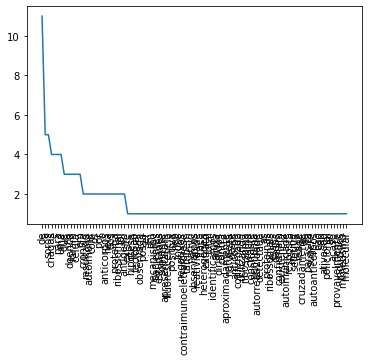

In [39]:
import matplotlib.pyplot as plt

x=[]
y=[]


for i in Counter(tokens_pre_processados).most_common():
  x.append(i[0])
  y.append(i[1])

plt.xticks(rotation=90)
plt.xticks(range(len(x)),x)
plt.plot(y)

plt.show()


TTR  - Palavras únicas (mais ricas lexicamente)

In [40]:
# função set() corta repetições
types = list(set(tokens_pre_processados))
types

['que',
 'sugere',
 'observamos',
 'a',
 'induzidos',
 'uma',
 'anticorpo',
 'heterogenea',
 'total',
 'seletiva',
 'reage',
 'contra',
 'foram',
 'autoimunidade',
 'estudados',
 'existencia',
 'lesao',
 'hep',
 'fraca',
 'as',
 'os',
 'detectada',
 'policlonal',
 'um',
 'reatividade',
 'constraste',
 'soros',
 'e',
 'apresentaram',
 'fluorescencia',
 'dos',
 'hipotese',
 'proteinas',
 'existe',
 'utilizando',
 'nenhuma',
 'resultado',
 'autoimune',
 'molecular',
 'dirigidos',
 'possa',
 'mimetismo',
 'com',
 'mecanismo',
 'nao',
 'sao',
 'todos',
 'proteina',
 'identificamos',
 'imune',
 'parasita',
 'doenca',
 'esses',
 'como',
 'ribossomais',
 'ativacao',
 'aproximadamente',
 'provavelmente',
 'autorreatividade',
 'nativo',
 'hela',
 'na',
 'dados',
 'confirmada',
 'de',
 'ribossomal',
 'somente',
 'anticorpos',
 'o',
 'cruzadamente',
 'autoanticorpos',
 'ser',
 'contraimunoeletroforese',
 'por',
 'ainda',
 'foi',
 'natureza',
 'tecidual',
 'deste',
 'observada',
 'ribossoma',
 'aca

In [41]:
# Quanto mais próximo de 1, maisrico é o texto
ttr = len(types) / len(tokens_pre_processados)
ttr 

0.6339869281045751

**Tagger - Etiquetador**

Classes Gramaticais

In [42]:
#pos = part of speech
# Se não encontrar a classe gramatical, ele usa X
etiquetas = [(token.orth_,token.pos_) for token in doc]
etiquetas 

[('Existe', 'VERB'),
 ('a', 'DET'),
 ('hipotese', 'NOUN'),
 ('que', 'SCONJ'),
 ('a', 'DET'),
 ('lesao', 'NOUN'),
 ('tecidual', 'ADJ'),
 ('observada', 'VERB'),
 ('na', 'ADP'),
 ('doenca', 'NOUN'),
 ('de', 'ADP'),
 ('chagas', 'NOUN'),
 ('cronica', 'PROPN'),
 ('possa', 'VERB'),
 ('ser', 'AUX'),
 ('resultado', 'NOUN'),
 ('de', 'ADP'),
 ('um', 'DET'),
 ('mecanismo', 'NOUN'),
 ('autoimune', 'ADJ'),
 ('.', 'PUNCT'),
 ('Soros', 'NOUN'),
 ('de', 'ADP'),
 ('102', 'NUM'),
 ('pacientes', 'NOUN'),
 ('com', 'ADP'),
 ('doenca', 'NOUN'),
 ('de', 'ADP'),
 ('chagas', 'NOUN'),
 ('cronica', 'ADJ'),
 ('foram', 'AUX'),
 ('estudados', 'VERB'),
 ('.', 'PUNCT'),
 ('Somente', 'ADV'),
 ('4', 'NUM'),
 ('soros', 'NOUN'),
 ('apresentaram', 'VERB'),
 ('fluorescencia', 'NOUN'),
 ('positiva', 'ADJ'),
 ('na', 'ADP'),
 ('celula', 'PROPN'),
 ('hep', 'PROPN'),
 ('2', 'NUM'),
 ('.', 'PUNCT'),
 ('Todos', 'DET'),
 ('os', 'DET'),
 ('soros', 'NOUN'),
 ('foram', 'AUX'),
 ('negativos', 'ADJ'),
 ('por', 'ADP'),
 ('contraimunoelet

In [43]:
classes_gramaticais = []

for i in etiquetas:
  classes_gramaticais.append(i[1])

Counter(classes_gramaticais).most_common()

[('NOUN', 41),
 ('ADP', 32),
 ('DET', 18),
 ('ADJ', 17),
 ('VERB', 16),
 ('PROPN', 14),
 ('PUNCT', 12),
 ('AUX', 7),
 ('ADV', 6),
 ('NUM', 5),
 ('CCONJ', 4),
 ('SCONJ', 2),
 ('SYM', 1),
 ('PRON', 1),
 ('SPACE', 1)]

# **Parser Sintático**

**Análise de dependência**

In [44]:
analise_dependencia = [(token.orth_,token.dep_) for token in doc]
analise_dependencia

[('Existe', 'ROOT'),
 ('a', 'det'),
 ('hipotese', 'nsubj'),
 ('que', 'mark'),
 ('a', 'det'),
 ('lesao', 'advcl'),
 ('tecidual', 'advmod'),
 ('observada', 'acl'),
 ('na', 'case'),
 ('doenca', 'obl'),
 ('de', 'case'),
 ('chagas', 'nmod'),
 ('cronica', 'amod'),
 ('possa', 'acl'),
 ('ser', 'aux:pass'),
 ('resultado', 'xcomp'),
 ('de', 'case'),
 ('um', 'det'),
 ('mecanismo', 'nmod'),
 ('autoimune', 'amod'),
 ('.', 'punct'),
 ('Soros', 'nsubj:pass'),
 ('de', 'case'),
 ('102', 'nummod'),
 ('pacientes', 'nmod'),
 ('com', 'case'),
 ('doenca', 'nmod'),
 ('de', 'case'),
 ('chagas', 'nmod'),
 ('cronica', 'amod'),
 ('foram', 'aux:pass'),
 ('estudados', 'ROOT'),
 ('.', 'punct'),
 ('Somente', 'advmod'),
 ('4', 'nummod'),
 ('soros', 'nsubj'),
 ('apresentaram', 'ROOT'),
 ('fluorescencia', 'obj'),
 ('positiva', 'amod'),
 ('na', 'case'),
 ('celula', 'obl'),
 ('hep', 'flat:name'),
 ('2', 'flat:name'),
 ('.', 'punct'),
 ('Todos', 'det'),
 ('os', 'det'),
 ('soros', 'nsubj'),
 ('foram', 'cop'),
 ('negativos'

In [45]:
from pathlib import Path

# Mostra a análise de dependencia gráfica
svg = spacy.displacy.render(doc, style= "dep")
output_path = Path('analisedependencia.svg')
output_path.open('w',encoding="utf-8").write(svg)


132447

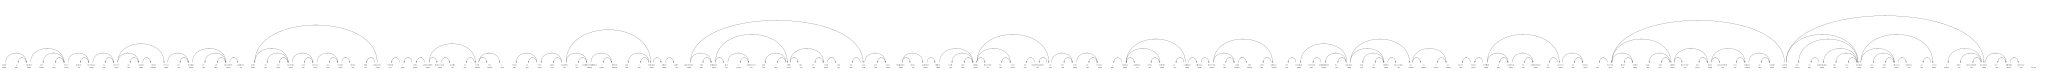

In [46]:
from IPython.display import SVG
SVG('analisedependencia.svg')


**Identificar as entidades nomeadas no texto**

In [47]:
entidades = list(doc.ents)
entidades

[hep 2, contraimunoeletroforese, p2, antigeno]

In [48]:
entidades_detalhes = [(entidades, entidades.label_) for entidades in doc.ents]
entidades_detalhes

[(hep 2, 'MISC'),
 (contraimunoeletroforese, 'LOC'),
 (p2, 'ORG'),
 (antigeno, 'PER')]